In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

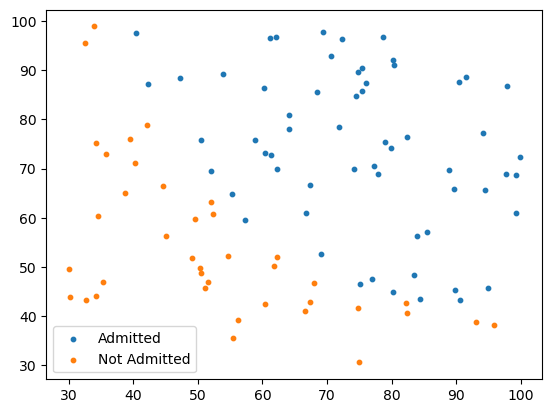

In [2]:
data = pd.read_csv("marks.txt")

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# filter out the applicants that got admitted
admitted = data.loc[y == 1]

# filter out the applicants that din't get admission
not_admitted = data.loc[y == 0]

# plots
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.legend()
plt.show()

X = X.to_numpy()
y = y.to_numpy()

[[1.75434612]
 [3.89944265]
 [3.70051008]]


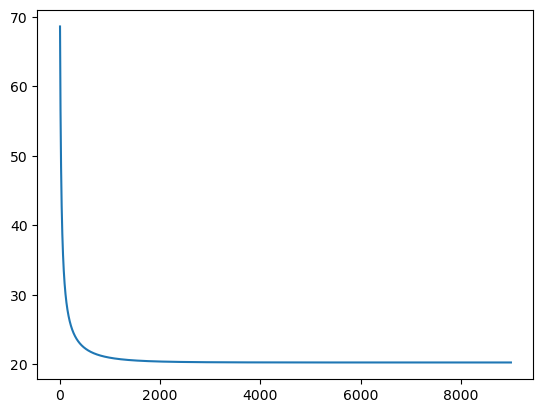

In [3]:
theta = np.array([[0],[0],[0]])
ep=1e-4
lr =1e-3
n_iter = 9000
y=y.reshape((len(y), 1))
x_b = np.c_[np.ones((len(X),1)),X]

#Standardization by z-score
nf,nc=x_b.shape
x_bs=x_b
for it in range(1,nc):
    m=np.mean(x_b[:,it])
    std=np.std(x_b[:,it])
    x_bs[:,it]=(x_b[:,it]-m)/std

j_cost=np.zeros([n_iter])
for it in range(n_iter):
    #Gradient
    pred = 1/(1+np.exp(-np.dot(x_bs,theta)))
    si=-lr*(x_bs.T.dot((pred - y)))
    theta = theta + si
    j_cost[it]=- np.sum(y*np.log(pred)+ ((1-y)*np.log(1-pred)))
plt.plot(j_cost)
print(theta)

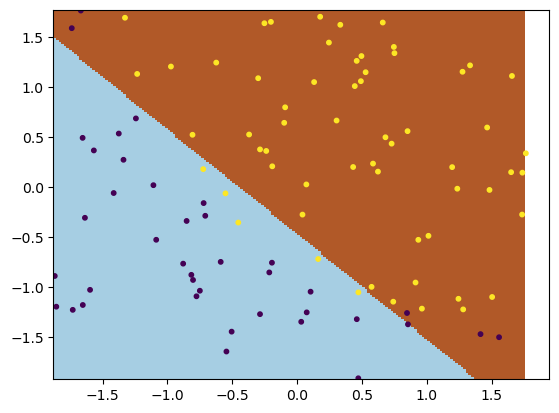

In [4]:
# plots
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(np.min(x_bs[:, 1]), np.max(x_bs[:, 1]), h), np.arange(np.min(x_bs[:, 2]), np.max(x_bs[:, 2]), h))
points=np.c_[np.ones((len(xx.ravel()),1)), xx.ravel(), yy.ravel()]
pred= 1/(1+np.exp(-np.dot(points,theta)))
pred = pred.reshape(xx.shape)
pred[pred<0.5]=0
pred[pred>=0.5]=1
plt.pcolormesh(xx, yy, pred, cmap=plt.cm.Paired,shading='auto')
plt.scatter(x_bs[:, 1], x_bs[:, 2],s=10, c=y)
plt.show()

[[ 6.83527033]
 [ 6.28226931]
 [ 6.78475917]
 [-3.15315862]
 [-1.93441914]
 [-2.33607549]]


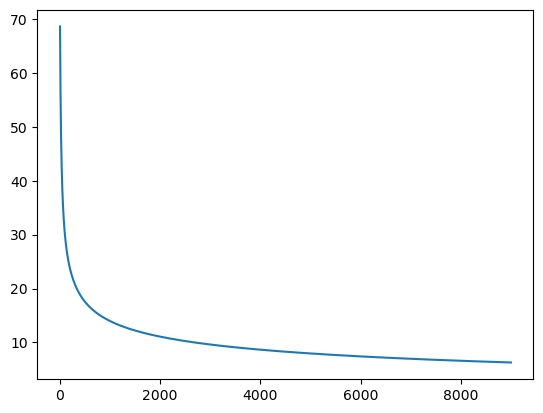

In [5]:
theta = np.array([[0],[0],[0],[0],[0],[0]])
theta=np.reshape(theta,(len(theta),1))


lr = 1e-3
epochs=9000
m=len(X)
m=np.mean(X)
std=np.std(X)
Xs=(X-m)/std

x_bs=np.c_[np.ones((len(Xs),1)),Xs[:,0],Xs[:,1],Xs[:,0]**2,Xs[:,0]*Xs[:,1],Xs[:,1]**2]
y=np.reshape(y,(len(y),1))
j_cost= np.zeros([epochs])

j_cost=np.zeros([n_iter])
for it in range(n_iter):
    #Gradient
    pred = 1/(1+np.exp(-np.dot(x_bs,theta)))
    si=-lr*(x_bs.T.dot((pred - y)))
    theta = theta + si
    j_cost[it]=- np.sum(y*np.log(pred)+ ((1-y)*np.log(1-pred)))
plt.plot(j_cost)
print(theta)

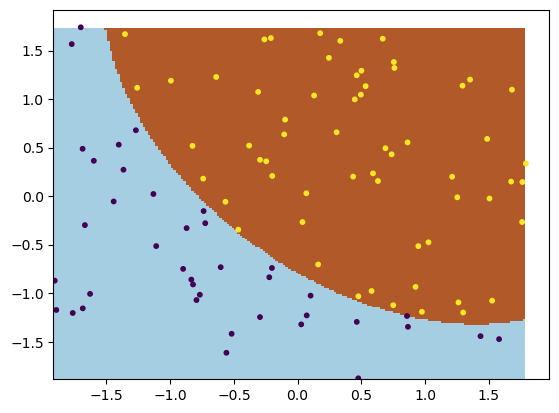

In [6]:
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(np.min(x_bs[:, 1]), np.max(x_bs[:, 1]), h), np.arange(np.min(x_bs[:, 2]), np.max(x_bs[:, 2]), h))


x_bs=np.c_[np.ones((len(Xs),1)),Xs[:,0],Xs[:,1],Xs[:,0]**2,Xs[:,0]*Xs[:,1],Xs[:,1]**2]
points=np.c_[np.ones((len(xx.ravel()),1)), xx.ravel(), yy.ravel(), xx.ravel()**2,xx.ravel()*yy.ravel(),yy.ravel()**2]

pred= 1/(1+np.exp(-np.dot(points,theta)))
pred = pred.reshape(xx.shape)
pred[pred<0.5]=0
pred[pred>=0.5]=1
plt.pcolormesh(xx, yy, pred, cmap=plt.cm.Paired,shading='auto')
plt.scatter(x_bs[:, 1], x_bs[:, 2],s=10, c=y)
plt.show()